# Table of Contents
 <p><div class="lev1 toc-item"><a href="#plot-NMI-as-beta-varies" data-toc-modified-id="plot-NMI-as-beta-varies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>plot NMI as beta varies</a></div><div class="lev1 toc-item"><a href="#Testing-on-football-network" data-toc-modified-id="Testing-on-football-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Testing on football network</a></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import igraph as ig
import modbp
import forceatlas2 as fa2
import seaborn as sbn
import sklearn.metrics as skm
# reload(modbp)

[(0, 470), (1, 61), (1, 130), (1, 361), (1, 436)]
niters to converge 56
[[0.49952154 0.50047846]
 [0.16975004 0.83024996]
 [0.17102181 0.82897819]
 [0.24820876 0.75179124]
 [0.55444925 0.44555075]
 [0.31353835 0.68646165]
 [0.60347918 0.39652082]
 [0.31894733 0.68105267]
 [0.16116934 0.83883066]
 [0.46753953 0.53246047]]
modularity igraph: 0.388342
AMI: 0.243
accuracy: 0.219
percent: 0.219


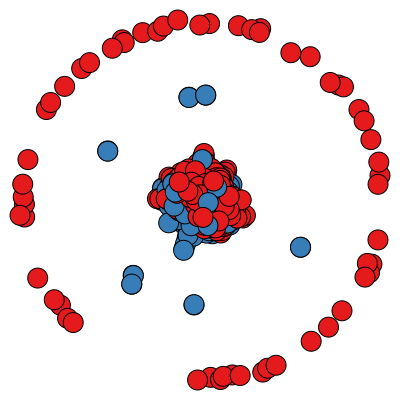

In [2]:
n=1000
q=2
nblocks=q
c=3.0
ep=.2
pin=c/(1.0+ep)/(n*1.0/q)
pout=c/(1+1.0/ep)/(n*1.0/q)
t=time()
prob_mat=np.identity(nblocks)*pin + (np.ones((nblocks,nblocks))-np.identity(nblocks))*pout

read=True
if read:
    RSBM=modbp.RandomSBMGraph(n,prob_mat,graph=ig.load('RSMB_test.graphml.gz'))
else:
    RSBM = modbp.RandomSBMGraph(n=n,comm_prob_mat=prob_mat)
    RSBM.graph.save('RSMB_test.graphml.gz')

color_dict=dict(zip(range(10),sbn.color_palette('Set1',10)))
# RSBM.graph.vs['color']=map(lambda x : color_dict[x],RSBM.graph.vs['block'])

elist=RSBM.get_edgelist()
elist.sort()
print elist[:5]

pv=modbp.bp.PairVector(elist)
bpgc=modbp.BP_Modularity(edgelist=pv, _n=n, q=q, beta=1.3, transform=False)
print 'niters to converge',bpgc.run(1000)
marg=np.array(bpgc.return_marginals())
print marg[:10]
part=np.argmax(marg,axis=1)
VC=ig.VertexClustering(RSBM.graph,membership=part)
# print "modularity: {:.6f}".format(mbpinterface.retrival_modularities[q][beta])
print "modularity igraph: {:.6f}".format(VC.modularity)
print "AMI: {:.3f}".format(RSBM.get_AMI_with_blocks(labels=part))
print "accuracy: {:.3f}".format(RSBM.get_accuracy(labels=part))
print "percent: {:.3f}".format(np.sum(RSBM.block==part)/(1.0*n))

RSBM.graph.vs['color']=map(lambda x : color_dict[x] ,np.argmax(marg,axis=1))
#create forceatlas layout
adj=np.array(RSBM.get_adjacency().data)
pos=fa2.forceatlas2(adj,scalingRatio=10,gravity=1,strongGravityMode=False,edgeWeightInfluence=0)
layout=ig.Layout(pos)
ig.plot(RSBM.graph,layout=layout,inline=True,bbox=[400,400])

# plot NMI as beta varies

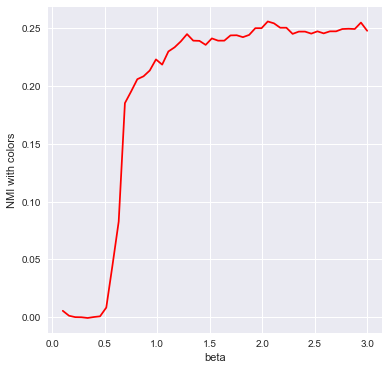

In [50]:
betas=np.linspace(.1,3,50)
fin_nmi=[]
for beta in betas:
    #This is where we would want to be able to recall the BP algorithm
    #without having to reconstruct the graph.  Presumably we could use 
    #the state of previous BP as warm initialization
    bpgc=modbp.BP_Modularity(edgelist=pv, _n=n, q=q, beta=beta, transform=False)
    bpgc.run()
    marg=np.array(bpgc.return_marginals())
    color_dict={0:"red",1:"blue",2:'green'}
    RSBM.graph.vs['color']=map(lambda x : color_dict[np.argmax(x)],marg)
    cnmi=RSBM.get_AMI_with_blocks(RSBM.graph.vs['color'])
#     print("NMI at beta={:.2f}: {:.3f}".format(beta,cnmi))
    fin_nmi.append(cnmi)

fin_nmi=np.array(fin_nmi)
plt.close()
f,a=plt.subplots(1,1,figsize=(6,6))
a.plot(betas,fin_nmi,color='r')
a.set_xlabel('beta')
a.set_ylabel('NMI with colors')
plt.show()

In [2]:
n = 1000
q = 2
nblocks = q
c = 3.0
ep = .1
pin = c / (1.0 + ep) / (n * 1.0 / q)
pout = c / (1 + 1.0 / ep) / (n * 1.0 / q)
prob_mat = np.identity(nblocks) * pin + (np.ones((nblocks, nblocks)) - np.identity(nblocks)) * pout
read = True
if read:
    print 'loading graph from file'
    RSBM = modbp.RandomSBMGraph(n, prob_mat, graph=ig.load('RSMB_test.graphml.gz'))
    print ("{:d},{:d}".format(RSBM.n,RSBM.m))
else:
    RSBM = modbp.RandomSBMGraph(n=n, comm_prob_mat=prob_mat,transform=False)
    RSBM.graph.save('RSMB_test.graphml.gz')

beta=1.5
#call directly
elist = RSBM.get_edgelist()
elist.sort()
pv = modbp.bp.PairVector(elist)
bpgc = modbp.BP_Modularity(edgelist=pv, _n=n, q=q, beta=beta, transform=False)
print ('niters to converge', bpgc.run(1000))
marg = np.array(bpgc.return_marginals())
print (marg[:5])
part=np.argmax(marg,axis=1)
print ("modularity: {:.4f} ".format(ig.VertexClustering(RSBM.graph,membership=part).modularity))
print ("AMI: {:.3f}".format(RSBM.get_AMI_with_blocks(labels=part)))
print ("accuracy: {:.3f}".format(np.sum(RSBM.block == part) / (1.0 * n)))

#test it with the calss method
mbpinterface = modbp.ModularityBP(RSBM.graph)  # create class
mbpinterface.run_modbp(beta,2,1000)
print mbpinterface.marginals[2][beta][:5]
print ('niters to converge',mbpinterface.niters[2][beta])
print ('modularity: {:.4f}'.format(mbpinterface.retrival_modularities[2][beta]))
print part[:20]
print mbpinterface.partitions[2][beta][:20]
print "AMI two partitions {:.3f}".format(skm.adjusted_mutual_info_score(part,mbpinterface.partitions[2][beta]))
# print 'AMI=',RSBM.get_AMI_with_blocks(mbpinterface.partitions[2][beta])
# print "accuracy=",RSBM.get_accuracy(mbpinterface.partitions[2][beta])

loading graph from file
1000,1466
('niters to converge', 51)
[[0.50214533 0.49785467]
 [0.95508852 0.04491148]
 [0.91563639 0.08436361]
 [0.84210188 0.15789812]
 [0.45473675 0.54526325]]
modularity: 0.3916 
AMI: 0.238
accuracy: 0.779


NameError: global name 'iters' is not defined

In [23]:
elist= randSBM.get_edgelist()
elist.sort()
print elist[:10]
print mbpinterface._edgelistpv

[(0, 28), (0, 45), (0, 57), (1, 14), (1, 56), (1, 73), (2, 8), (2, 47), (2, 58), (2, 68)]
<modbp.bp.PairVector; proxy of <Swig Object of type 'vector< std::pair< unsigned long,unsigned long >,std::allocator< std::pair< unsigned long,unsigned long > > > *' at 0x105e33fc0> >


In [5]:
mbpinterface=modbp.ModularityBP(randSBM.graph)
mbpinterface.run_modbp(q=2,beta=1.2)
print mbpinterface.retrival_modularities

{2: {1.2: 0.38336985040476235}}


[[0.005 0.001]
 [0.001 0.005]]
average degree: 3.080


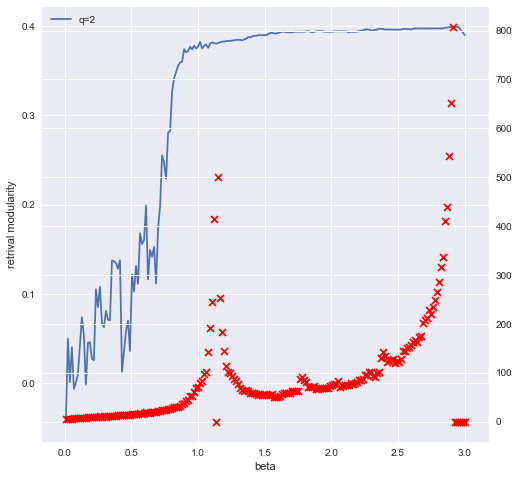

In [4]:
n=1000
q=2
nblocks=q
c=3.0
ep=.2
pin=c/(1.0+ep)/(n*1.0/q)
pout=c/(1+1.0/ep)/(n*1.0/q)
prob_mat = np.identity(q) * pin + (np.ones((q, q)) - np.identity(q)) * pout
print prob_mat
randSBM=modbp.RandomSBMGraph(n,prob_mat)
mbpinterface=modbp.ModularityBP(randSBM.graph)

print("average degree: {:.3f}".format(2.0*mbpinterface.m/mbpinterface.n))
betas=np.linspace(.01,3,200)
# betas=np.array([.1,.5,1,1.2])
qs=np.array([2])#,4,5])

for q in qs:
    for beta in betas:
        mbpinterface.run_modbp(q=q,beta=beta,niter=1000)

plt.close()
f,a=plt.subplots(1,1,figsize=(8,8))

for q in qs:
    b,t=zip(*sorted(mbpinterface.niters[q].items(),key=lambda x: x[0]))
    b,m=zip(*sorted(mbpinterface.retrival_modularities[q].items(),key=lambda x: x[0]))
    a.plot(b,m,label="q={:d}".format(q))
    a2=a.twinx()
    a2.scatter(b,t,marker='x',color='red',label='covergence')


a.set_xlabel("beta")
a.set_ylabel("retrival modularity")
a.legend()
plt.show()


In [14]:
mbpinterface.retrival_modularities

{2: {0.1: 0.002787948166651867,
  0.5: 0.0,
  1.0: 0.019623427795108374,
  1.1: 0.01190433504248981}}

# Testing on football network
We scan to look at how many communities are suggested

In [3]:
fbnet=ig.load("./football.net.graphml.gz")
n=fbnet.vcount()
elist=fbnet.get_edgelist()
elist.sort()
pv=modbp.bp.PairVector(elist)
bpgc=modbp.BP_Modularity(edgelist=pv, n=n, q=q, beta=1,resgamma=1, transform=False)
bpgc.run()
marg=np.array(bpgc.return_marginals())


print("time to construct {:.4f}".format(time()-t))

NameError: name 'q' is not defined